In [44]:
# import Libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sb
import matplotlib.pyplot as plt
import re

### Extract Data

In [45]:
df1 = pd.read_csv('df_1.csv')
rm_shapefile = gpd.read_file('RuralMunicipality.shp')

### Transform Data

In [46]:
def clean_text(text):
    # Remove special characters and digits
    text_cleaned = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Keeps only letters and spaces
    # Convert to uppercase
    text_cleaned = text_cleaned.upper()
    return text_cleaned

dfc1 = df1['RM'].apply(clean_text).str.strip()
dfc1_unique = dfc1.drop_duplicates()

KeyError: 'number_of_RM'

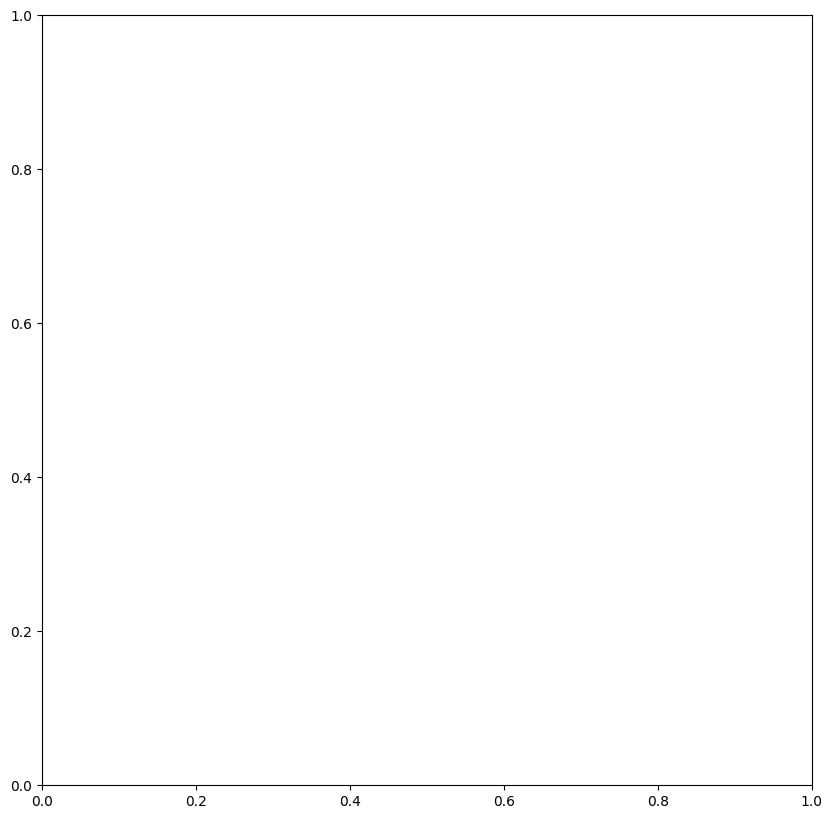

In [47]:
merged_data = pd.merge(rm_shapefile.rename(columns={'RMNO':'RM'}), dfc1_unique, on='RM', how='inner')

# Step 4: Plot the merged data
merged_data.plot(column='number_of_RM', legend=True, figsize=(10, 10))
#plt.title('Map of Number of Rooms')
#plt.show()